参考资料：<br>
参数-interpolation：https://blog.csdn.net/liangjiubujiu/article/details/80420555 <br>
词云图绘制网站：https://wordart.com/ <br>
python-wordcloud介绍：https://amueller.github.io/word_cloud/index.html <br>
python-wordcloud GitHub：https://hub.fastgit.org/amueller/word_cloud

# wordcloud词云图

In [3]:
#设置文件路径
import os
os.chdir("D:/python_ex/word_cloud/word_cloud-master/examples/")

## 英文词云图

### demo 

图1是真正的demo,object认状态什么参数都没改。<br>
图2用max_font_size限制了最大的字号。

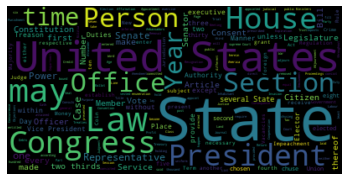

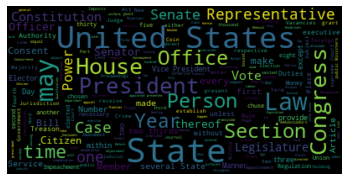

In [35]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'constitution.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

### 图片颜色配置词云图 

词云图颜色根据图片对应位置的颜色来配置

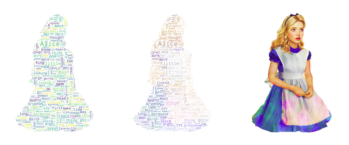

In [46]:
#!/usr/bin/env python
"""
Image-colored wordcloud
=======================

You can color a word-cloud by using an image-based coloring strategy
implemented in ImageColorGenerator. It uses the average color of the region
occupied by the word in a source image. You can combine this with masking -
pure-white will be interpreted as 'don't occupy' by the WordCloud object when
passed as mask.
If you want white as a legal color, you can just pass a different image to
"mask", but make sure the image shapes line up.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "alice_color.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()


###  先计算词频再生成词云图

其他都是用文本直接生成词云图(generate)，这里是先统计词频然后再生成词云图普(generate_from_frequencies)

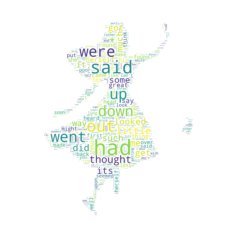

In [38]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    alice_mask = np.array(Image.open("alice_mask.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'alice.txt'), encoding='utf-8')
text = text.read()
makeImage(getFrequencyDictForText(text))

### 自定义颜色函数

第一幅：自定义；第二幅：默认颜色

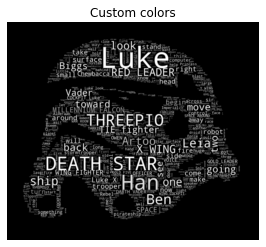

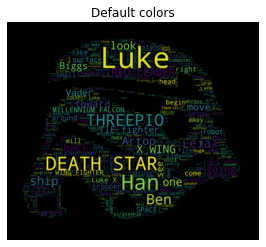

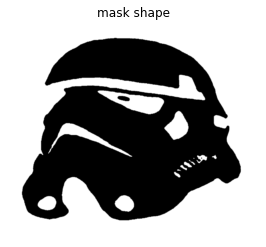

In [42]:
#!/usr/bin/env python
"""
Using custom colors
===================

Using the recolor method and custom coloring functions.
"""

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 200)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'a_new_hope.txt')).read()

# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1),
           interpolation="bilinear")
#wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.title("mask shape")
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

### 使用图片形状

使用alice_mask.png(即图2)的形状，绘制词云图

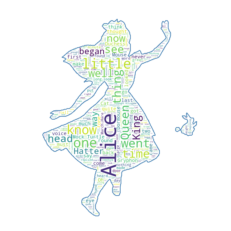

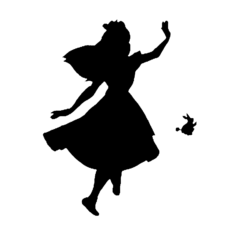

In [8]:
#!/usr/bin/env python
"""
Masked wordcloud
================

Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS
import wordcloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')#
 


# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

###  图像彩色词云

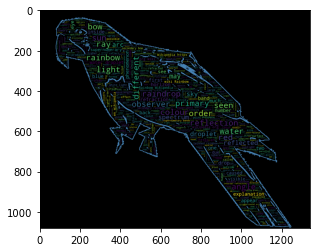

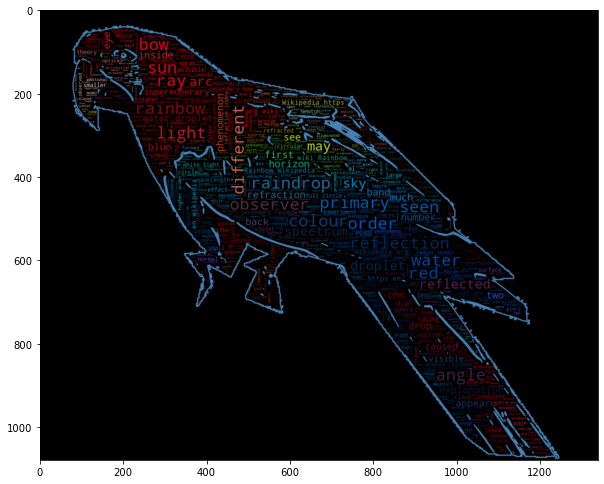

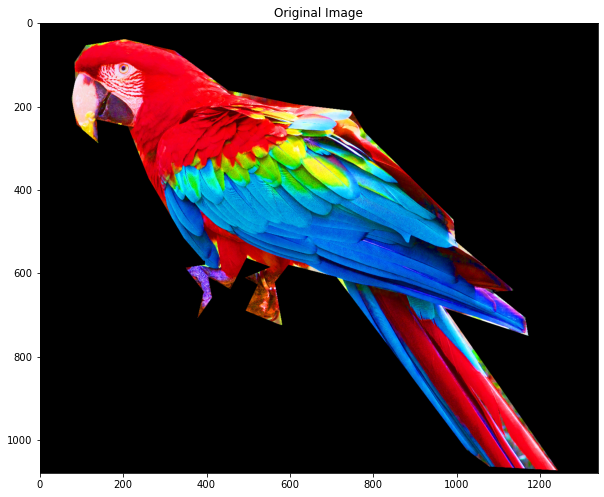

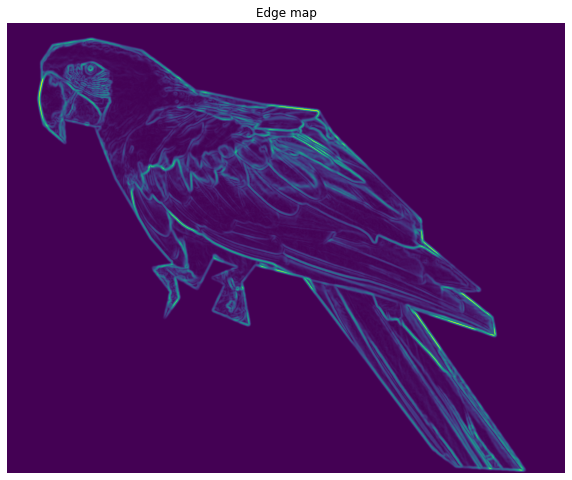

In [105]:
"""
Image-colored wordcloud with boundary map
=========================================
A slightly more elaborate version of an image-colored wordcloud
that also takes edges in the image into account.
Recreating an image similar to the parrot example.
"""

import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)#,contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.axis("off")
plt.show()



### emoji 

显示有问题

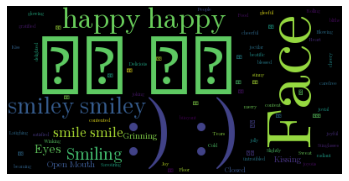

In [47]:
#!/usr/bin/env python
"""
Emoji Example
===============
A simple example that shows how to include emoji.  Note that this example does not seem to work on OS X, but does
work correctly in Ubuntu.

There are 3 important steps to follow to include emoji:
1) Read the text input with io.open instead of the built in open.  This ensures that it is loaded as UTF-8
2) Override the regular expression used by word cloud to parse the text into words.  The default expression
will only match ascii words
3) Override the default font to something that supports emoji.  The included Symbola font includes black and
white outlines for most emoji.  There are currently issues with the PIL/Pillow library that seem to prevent
it from functioning correctly on OS X (https://github.com/python-pillow/Pillow/issues/1774), so try this
on ubuntu if you are having problems.
"""
import io
import os
import string
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# It is important to use io.open to correctly load the file as UTF-8
text = io.open(path.join(d, 'happy-emoji.txt')).read()

# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)

# Generate a word cloud image
# The Symbola font includes most emoji
font_path = path.join(d, 'fonts', 'Symbola', 'Symbola.ttf')
wc = WordCloud(font_path=font_path, regexp=regexp).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.show()


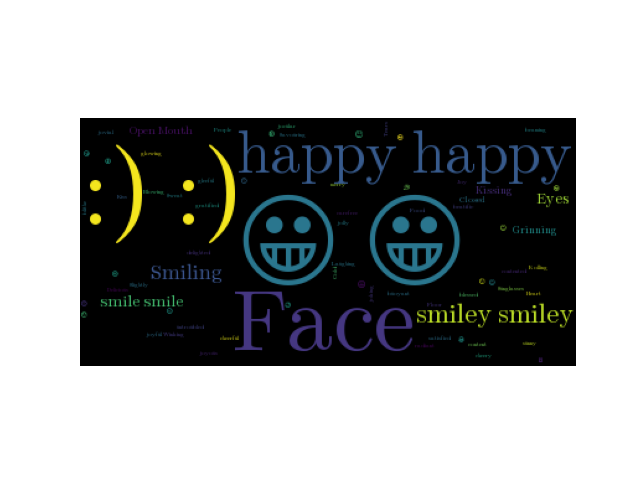

### 按组配色

自定义每个颜色给哪些词语配色<br>
通过修改color_to_words实现颜色对应词语的变化。

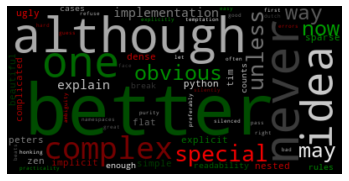

In [34]:
#!/usr/bin/env python
"""
Colored by Group Example
========================

Generating a word cloud that assigns colors to words based on
a predefined mapping from colors to words
"""

from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
#grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## 中文词云图 

中文文本需要用jieba先分词，然后再做词云图。

### 图片颜色配置词云图-中文

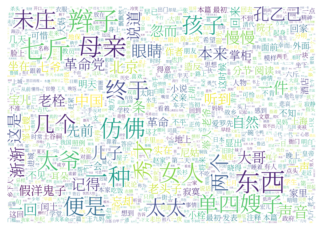

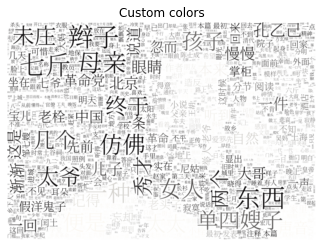

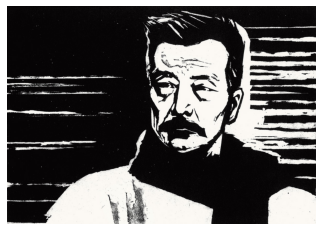

In [87]:
import jieba
from os import path
from imageio import imread
import matplotlib.pyplot as plt
import os
#,color_func=wordcloud.get_single_color_func("yellow")
os.chdir("D:/python_ex/word_cloud/word_cloud-master/examples/")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

#
stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'
# Chinese fonts must be set
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# read the mask / color image taken from
#用来修改配色的图片
back_coloring = imread(path.join(d, d + '/wc_cn/LuXun_black.jpg'))

#输入文本文件
# Read the whole text.  
text = open(path.join(d, d + '/wc_cn/CalltoArms.txt'),encoding='utf-8').read()


# The function for processing text with Jieba
def jieba_processing_txt(text):
    jieba.load_userdict("wc_cn/userdict.txt")
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)

wc = WordCloud(font_path=font_path,background_color="white", max_words=2000, mask=back_coloring,
               max_font_size=100, random_state=42)

wc.generate(jieba_processing_txt(text))


#******不做任何配色修改的词云图******
plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, d+'/wc_cn/LuXun1.jpg'))  #结果保存至/wc_cn/LuXun.jpg

#鲁迅配色的词云图
plt.figure()
# # create coloring from image
image_colors_byImg = ImageColorGenerator(back_coloring)
#plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=image_colors_byImg, random_state=1),
           interpolation="bilinear")
#wc.to_file("a_new_hope.png")
plt.axis("off")
plt.show()
wc.to_file(path.join(d, d+'/wc_cn/LuXun_colored2.jpg'))

#*******鲁迅原图**********
plt.figure()
plt.imshow(back_coloring)
plt.axis("off")
plt.show()

###  使用图片形状

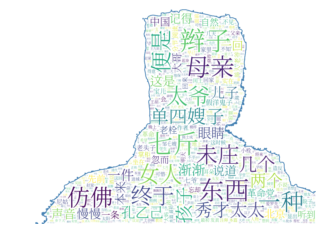

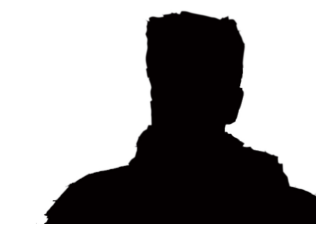

In [97]:
import jieba
from os import path
from imageio import imread
import matplotlib.pyplot as plt
import os
os.chdir("D:/python_ex/word_cloud/word_cloud-master/examples/")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

#停用词文件
stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'
# Chinese fonts must be set
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# read the mask / color image taken from
#背景图片
back_coloring = imread(path.join(d, d + '/wc_cn/LuXun_black_mask.jpg'))

#输入文本文件
# Read the whole text.  
text = open(path.join(d, d + '/wc_cn/CalltoArms.txt'),encoding='utf-8').read()


# The function for processing text with Jieba
def jieba_processing_txt(text):
    jieba.load_userdict("wc_cn/userdict.txt")  #用户词典文件
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)

wc = WordCloud(font_path=font_path,background_color="white", max_words=2000, mask=back_coloring,
              max_font_size=100, random_state=42,contour_width=3, contour_color='steelblue')

wc.generate(jieba_processing_txt(text))

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file(path.join(d, d+'/wc_cn/LuXun_mask.jpg'))

#*******鲁迅原图**********
plt.figure()
plt.imshow(back_coloring)
plt.axis("off")
plt.show()

### 使用词频生成词云图

如果已经生成 word_freq.xlsx 文件，列名为word和freq,可用此段代码生成词云图

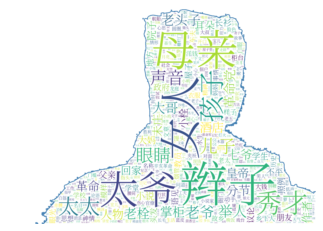

In [104]:
import jieba
from os import path
from imageio import imread
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("D:/python_ex/word_cloud/word_cloud-master/examples/")
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Chinese fonts must be set
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

#背景图片
back_coloring = imread(path.join(d, d + '/wc_cn/LuXun_black_mask.jpg'))



def makeImage(text):
    back_coloring = imread(path.join(d, d + '/wc_cn/LuXun_black_mask.jpg'))

    wc = WordCloud(font_path=font_path,background_color="white", max_words=1000, mask=back_coloring,
                  contour_width=3, contour_color='steelblue')
    # generate word cloud
    wc.generate_from_frequencies(text)
    wc.to_file(path.join(d, d+'/wc_cn/LuXun_wordfreq.jpg'))
    
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    

#输入文本文件 
wordfreq = pd.read_excel(d+"/wc_cn/word_freq.xlsx")
word = word_freq.word  # 词
value = word_freq.freq  # 词的频率
dic = dict(zip(word, value))
makeImage(dic)

#### [回顾]中文词频分析 

视频讲解：https://www.bilibili.com/video/BV1eD4y1X73w/

In [99]:
import os
import jieba
import jieba.posseg as psg
import re
import pandas as pd
def get_stop_dict(file):
    content = open(file,encoding="utf-8")
    word_list = []
    for c in content:
        c = re.sub('\n|\r','',c)
        word_list.append(c)
    return word_list

file_path = input("请输入当前文件夹路径:")
os.chdir(file_path)
stop_file = input("请输入停用词文件名字:")
user_file = input("请输入用户词典文件名字:")
##stop_file = "stopwordlist.txt"
##user_file = "add_word_list.txt"

stop_words = get_stop_dict(stop_file)
file_name = input("请输入文件名字:")
text = open(file_name,encoding="utf-8").read()
jieba.load_userdict(user_file)
text_lines  = text.split('\n')

flag_list = ['n','nz','vn']
counts={}

for line in text_lines:
    line_seg = psg.cut(line)
    for word_flag in line_seg:
        word = re.sub("[^\u4e00-\u9fa5]","",word_flag.word)
        if word_flag.flag in flag_list and len(word)>1 and word not in stop_words:
            counts[word]=counts.get(word,0)+1

word_freq = pd.DataFrame({'word':list(counts.keys()),'freq':list(counts.values())})
word_freq = word_freq.sort_values(by='freq',ascending=False)
word_freq.to_excel("word_freq.xlsx",index=False)

print("done!")

请输入当前文件夹路径:D:\python_ex\word_cloud\word_cloud-master\examples\wc_cn
请输入停用词文件名字:stopwords_cn_en.txt
请输入用户词典文件名字:userdict.txt
请输入文件名字:CalltoArms.txt
Press <enter>


''

### 用图片颜色扣词云图（慎用）

第一个结果图为默认颜色默认结果图<br>
第二个图是根据第三个图中的颜色布局来调色,并且只显示非白色区域，注意观察，鲁迅身体之外的词语被省略了。

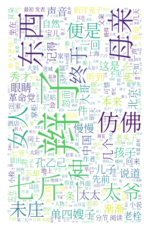

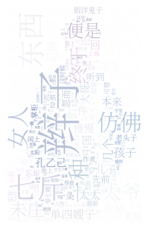

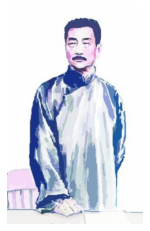

In [29]:
import jieba
#jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows
from os import path
from imageio import imread
import matplotlib.pyplot as plt
import os
# jieba.load_userdict("txt\userdict.txt")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'
# Chinese fonts must be set
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# the path to save worldcloud
imgname1 = d + '/wc_cn/LuXun.jpg'
imgname2 = d + '/wc_cn/LuXun_colored.jpg'
# read the mask / color image taken from
back_coloring = imread(path.join(d, d + '/wc_cn/LuXun_color.jpg'))

# Read the whole text.  ************1、替换你的文本文件**************
text = open(path.join(d, d + '/wc_cn/CalltoArms.txt'),encoding='utf-8').read()

# if you want use wordCloud,you need it
# add userdict by add_word()
userdict_list = ['阿Ｑ', '孔乙己', '单四嫂子']


# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)


wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=back_coloring,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2)


wc.generate(jieba_processing_txt(text))

# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname1))

# create coloring from image
image_colors_byImg = ImageColorGenerator(back_coloring)

# show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors_byImg), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(back_coloring, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname2))

# pyecharts词云图

In [68]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://gallery.echartsjs.com/editor.html?c=xS1jMxuOVm

目前无法实现的功能:

1、暂无
"""

data = [
    ("生活资源", "999"),
    ("供热管理", "888"),
    ("供气质量", "777"),
    ("生活用水管理", "688"),
    ("一次供水问题", "588"),
    ("交通运输", "516"),
    ("城市交通", "515"),
    ("环境保护", "483"),
    ("房地产管理", "462"),
    ("城乡建设", "449"),
    ("社会保障与福利", "429"),
    ("社会保障", "407"),
    ("文体与教育管理", "406"),
    ("公共安全", "406"),
    ("公交运输管理", "386"),
    ("出租车运营管理", "385"),
    ("供热管理", "375"),
    ("市容环卫", "355"),
    ("自然资源管理", "355"),
    ("粉尘污染", "335"),
    ("噪声污染", "324"),
    ("土地资源管理", "304"),
    ("物业服务与管理", "304"),
    ("医疗卫生", "284"),
    ("粉煤灰污染", "284"),
    ("占道", "284"),
    ("供热发展", "254"),
    ("农村土地规划管理", "254"),
    ("生活噪音", "253"),
    ("供热单位影响", "253"),
    ("城市供电", "223"),
    ("房屋质量与安全", "223"),
    ("大气污染", "223"),
    ("房屋安全", "223"),
    ("文化活动", "223"),
    ("拆迁管理", "223"),
    ("公共设施", "223"),
    ("供气质量", "223"),
    ("供电管理", "223"),
    ("燃气管理", "152"),
    ("教育管理", "152"),
    ("医疗纠纷", "152"),
    ("执法监督", "152"),
    ("设备安全", "152"),
    ("政务建设", "152"),
    ("县区、开发区", "152"),
    ("宏观经济", "152"),
    ("教育管理", "112"),
    ("社会保障", "112"),
    ("生活用水管理", "112"),
    ("物业服务与管理", "112"),
    ("分类列表", "112"),
    ("农业生产", "112"),
    ("二次供水问题", "112"),
    ("城市公共设施", "92"),
    ("拆迁政策咨询", "92"),
    ("物业服务", "92"),
    ("物业管理", "92"),
    ("社会保障保险管理", "92"),
    ("低保管理", "92"),
    ("文娱市场管理", "72"),
    ("城市交通秩序管理", "72"),
    ("执法争议", "72"),
    ("商业烟尘污染", "72"),
    ("占道堆放", "71"),
    ("地上设施", "71"),
    ("水质", "71"),
    ("无水", "71"),
    ("供热单位影响", "71"),
    ("人行道管理", "71"),
    ("主网原因", "71"),
    ("集中供热", "71"),
    ("客运管理", "71"),
    ("国有公交（大巴）管理", "71"),
    ("工业粉尘污染", "71"),
    ("治安案件", "71"),
    ("压力容器安全", "71"),
    ("身份证管理", "71"),
    ("群众健身", "41"),
    ("工业排放污染", "41"),
    ("破坏森林资源", "41"),
    ("市场收费", "41"),
    ("生产资金", "41"),
    ("生产噪声", "41"),
    ("农村低保", "41"),
    ("劳动争议", "41"),
    ("劳动合同争议", "41"),
    ("劳动报酬与福利", "41"),
    ("医疗事故", "21"),
    ("停供", "21"),
    ("基础教育", "21"),
    ("职业教育", "21"),
    ("物业资质管理", "21"),
    ("拆迁补偿", "21"),
    ("设施维护", "21"),
    ("市场外溢", "11"),
    ("占道经营", "11"),
    ("树木管理", "11"),
    ("农村基础设施", "11"),
    ("无水", "11"),
    ("供气质量", "11"),
    ("停气", "11"),
    ("市政府工作部门（含部门管理机构、直属单位）", "11"),
    ("燃气管理", "11"),
    ("市容环卫", "11"),
    ("新闻传媒", "11"),
    ("人才招聘", "11"),
    ("市场环境", "11"),
    ("行政事业收费", "11"),
    ("食品安全与卫生", "11"),
    ("城市交通", "11"),
    ("房地产开发", "11"),
    ("房屋配套问题", "11"),
    ("物业服务", "11"),
    ("物业管理", "11"),
    ("占道", "11"),
    ("园林绿化", "11"),
    ("户籍管理及身份证", "11"),
    ("公交运输管理", "11"),
    ("公路（水路）交通", "11"),
    ("房屋与图纸不符", "11"),
    ("有线电视", "11"),
    ("社会治安", "11"),
    ("林业资源", "11"),
    ("其他行政事业收费", "11"),
    ("经营性收费", "11"),
    ("食品安全与卫生", "11"),
    ("体育活动", "11"),
    ("有线电视安装及调试维护", "11"),
    ("低保管理", "11"),
    ("劳动争议", "11"),
    ("社会福利及事务", "11"),
    ("一次供水问题", "11"),
]


(
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
    .render("basic_wordcloud.html")
)


'D:\\python_ex\\word_cloud\\word_cloud-master\\examples\\basic_wordcloud.html'